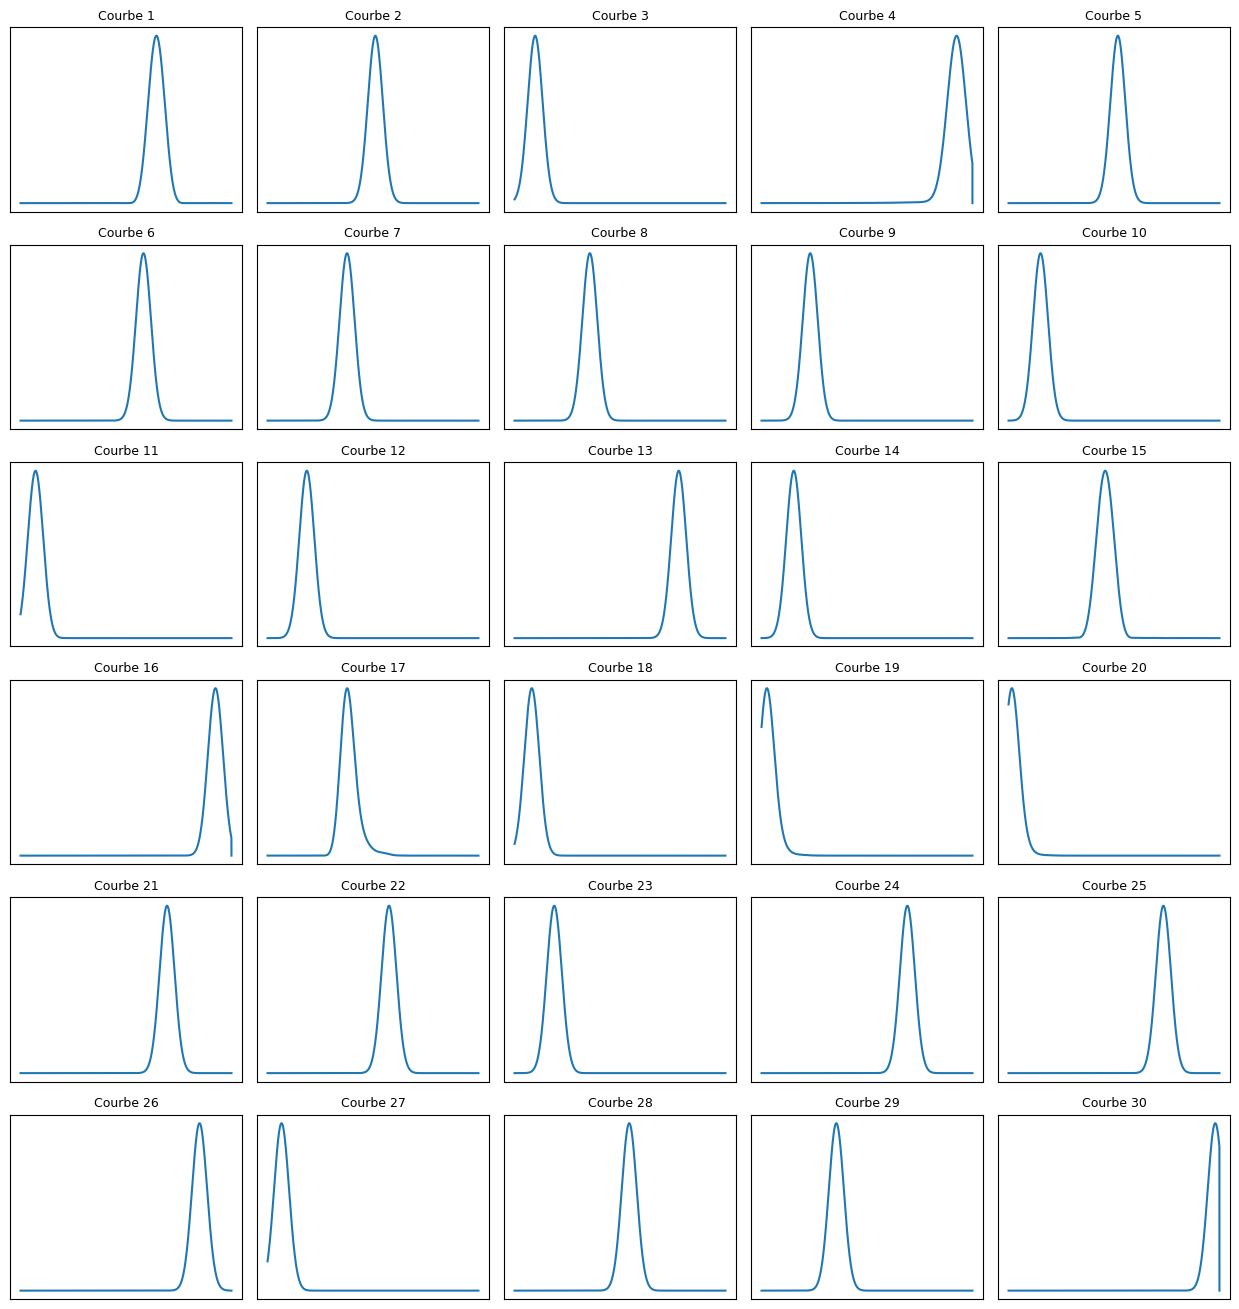

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Chargement des données
x_data = np.load('data/X_data_array_5000.npy')
y_data = np.load('data/y_data_array_5000.npy')

# Réduction de Y : on prend 1 point sur 10 (axis=1)
#y_data = y_data[:, ::10]  # (n, 500)

# Affichage des 30 premières courbes, une par subplot
n_examples = 30
n_cols = 5
n_rows = 6

plt.figure(figsize=(2.5*n_cols, 2.2*n_rows))
for i in range(n_examples):
    plt.subplot(n_rows, n_cols, i+1)
    plt.plot(np.arange(1, 5001), y_data[i])
    plt.title(f"Courbe {i+1}", fontsize=9)
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()


In [10]:
# Supposons que y_data est de forme (n_samples, 5000)
# et frequencies est déjà défini comme tu l'as indiqué
frequencies = np.linspace(171309976000000, 222068487407407, 5000)

# Pour chaque sample, trouver l'indice du maximum, puis la fréquence correspondante
label_data = frequencies[np.argmax(y_data, axis=1)]
print("Label data shape:", label_data.shape)

Label data shape: (3590,)


In [11]:
import os

# Supposons que x_data, y_data et label_data existent déjà
# Crée le dossier data/ s'il n'existe pas
os.makedirs('data', exist_ok=True)

# Sauvegarde les fichiers au format .npy
np.save('data/x_data.npy', x_data)
np.save('data/y_data.npy', y_data)
np.save('data/label_data.npy', label_data)

# ----------------------------------------------------------------------------------------------------------------------------------------

In [2]:
import pandas as pd

dataset = pd.read_csv('C:\\Users\\gabriel.legros\\Documents\\VSCode\\Github\\C2N\\CVAE\\data\\NN_training_combine_new.csv')
print("Shape :", dataset.shape)
print("Colonnes :", dataset.columns.tolist())
print(dataset.head(20))
print(dataset.describe())

Shape : (9801, 16)
Colonnes : ['w', 'DC', 'pitch', 'k', 'E_5000', 'E_500', 'E_50', 'nombre_de_pics_5000', 'peak0_5000', 'peak1_5000', 'nombre_de_pics_500', 'peak0_500', 'peak1_500', 'nombre_de_pics_50', 'peak0_50', 'peak1_50']
        w    DC  pitch             k  \
0   568.0  0.79  443.0  4.396811e+06   
1   569.0  0.38  593.0  4.873972e+06   
2   568.0  0.63  494.0  4.578839e+06   
3   568.0  0.63  291.0  6.477511e+06   
4   568.0  0.34  566.0  3.996372e+06   
5   568.0  0.59  485.0  5.311559e+06   
6   568.0  0.45  333.0  7.358685e+06   
7   567.0  0.79  471.0  4.669034e+06   
8   568.0  0.25  412.0  6.252684e+06   
9   567.0  0.66  277.0  7.485383e+06   
10  567.0  0.51  552.0  5.349814e+06   
11  567.0  0.40  464.0  5.958193e+06   
12  566.0  0.38  388.0  6.477511e+06   
13  566.0  0.26  298.0  5.692819e+06   
14  564.0  0.78  482.0  5.474975e+06   
15  565.0  0.77  591.0  3.189434e+06   
16  565.0  0.60  566.0  4.329403e+06   
17  565.0  0.56  329.0  9.166957e+06   
18  564.0  0.

In [3]:
# Affiche le nom des colonnes du DataFrame
print(dataset.columns.tolist())

['w', 'DC', 'pitch', 'k', 'E_5000', 'E_500', 'E_50', 'nombre_de_pics_5000', 'peak0_5000', 'peak1_5000', 'nombre_de_pics_500', 'peak0_500', 'peak1_500', 'nombre_de_pics_50', 'peak0_50', 'peak1_50']


In [4]:
# Affichage du min et max pour les 4 premières colonnes
for col in ['w', 'DC', 'pitch', 'k']:
    min_val = dataset[col].min()
    max_val = dataset[col].max()
    print(f"{col} : min = {min_val}, max = {max_val}")

w : min = 200.0, max = 600.0
DC : min = 0.1, max = 0.9
pitch : min = 100.0, max = 600.0
k : min = 1570796.326794896, max = 31415926.53589793


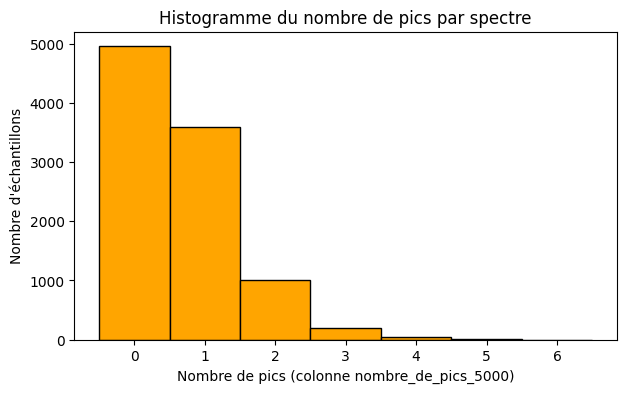

In [5]:
# Affichage de l'histogramme du nombre de pics
plt.figure(figsize=(7, 4))
plt.hist(dataset['nombre_de_pics_5000'], bins=range(int(dataset['nombre_de_pics_5000'].min()), int(dataset['nombre_de_pics_5000'].max())+2), color='orange', edgecolor='black', align='left')
plt.xlabel("Nombre de pics (colonne nombre_de_pics_5000)")
plt.ylabel("Nombre d'échantillons")
plt.title("Histogramme du nombre de pics par spectre")
plt.xticks(range(int(dataset['nombre_de_pics_5000'].min()), int(dataset['nombre_de_pics_5000'].max())+1))
plt.show()

In [6]:
# Création d'une copie du dataset avec uniquement les colonnes souhaitées
colonnes_a_garder = ['w', 'DC', 'pitch', 'k', 'E_5000', 'nombre_de_pics_5000']
dataset_reduit = dataset[colonnes_a_garder].copy()

print(dataset_reduit.head())

       w    DC  pitch             k  \
0  568.0  0.79  443.0  4.396811e+06   
1  569.0  0.38  593.0  4.873972e+06   
2  568.0  0.63  494.0  4.578839e+06   
3  568.0  0.63  291.0  6.477511e+06   
4  568.0  0.34  566.0  3.996372e+06   

                                              E_5000  nombre_de_pics_5000  
0  [0.0003853956510593869, 0.0003840104950771953,...                    1  
1  [0.01549188430145825, 0.01545627737975122, 0.0...                    2  
2  [8.405242663615199e-05, 8.414132968593387e-05,...                    1  
3  [12.77609273103656, 12.97537256380745, 13.1773...                    1  
4  [4.015748174592068e-05, 4.012544489675894e-05,...                    1  


In [7]:
import ast

# Conversion de la colonne E_5000 de string vers liste de floats
dataset_reduit['E_5000'] = dataset_reduit['E_5000'].apply(ast.literal_eval)

# (Optionnel) Pour vérifier le type et la shape du premier élément
print(type(dataset_reduit['E_5000'].iloc[0]))
print(np.array(dataset_reduit['E_5000'].iloc[0]).shape)

<class 'list'>
(5000,)


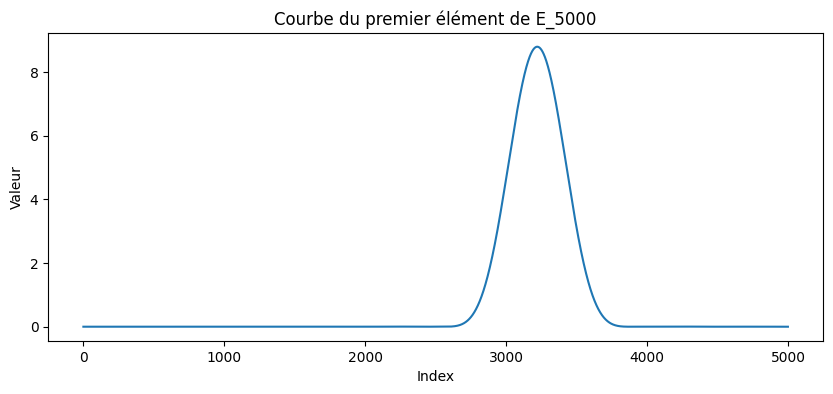

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(dataset_reduit['E_5000'].iloc[0])
plt.xlabel("Index")
plt.ylabel("Valeur")
plt.title("Courbe du premier élément de E_5000")
plt.show()

In [38]:
# Séparation du dataset en deux DataFrames
#----------------------------------------------------

# DataFrame des features (X et y)
x_data = dataset_reduit[['w', 'DC', 'pitch', 'k']].copy()
y_data = np.stack(dataset_reduit['E_5000'].values)

# DataFrame des labels
label_data = dataset_reduit[['nombre_de_pics_5000']].copy()

print("x_data shape:", x_data.shape)
print("y_data shape:", y_data.shape)
print("label_data shape:", label_data.shape)

x_data shape: (9801, 4)
y_data shape: (9801, 5000)
label_data shape: (9801, 1)


In [35]:
# Garder uniquement les lignes où label_data == 0
mask = label_data['nombre_de_pics_5000'] == 0
x_data = x_data[mask].reset_index(drop=True)
y_data = y_data[mask.values]
label_data = label_data[mask].reset_index(drop=True)

print("x_data shape:", x_data.shape)
print("y_data shape:", y_data.shape)
print("label_data shape:", label_data.shape)

x_data shape: (4956, 4)
y_data shape: (4956, 5000)
label_data shape: (4956, 1)


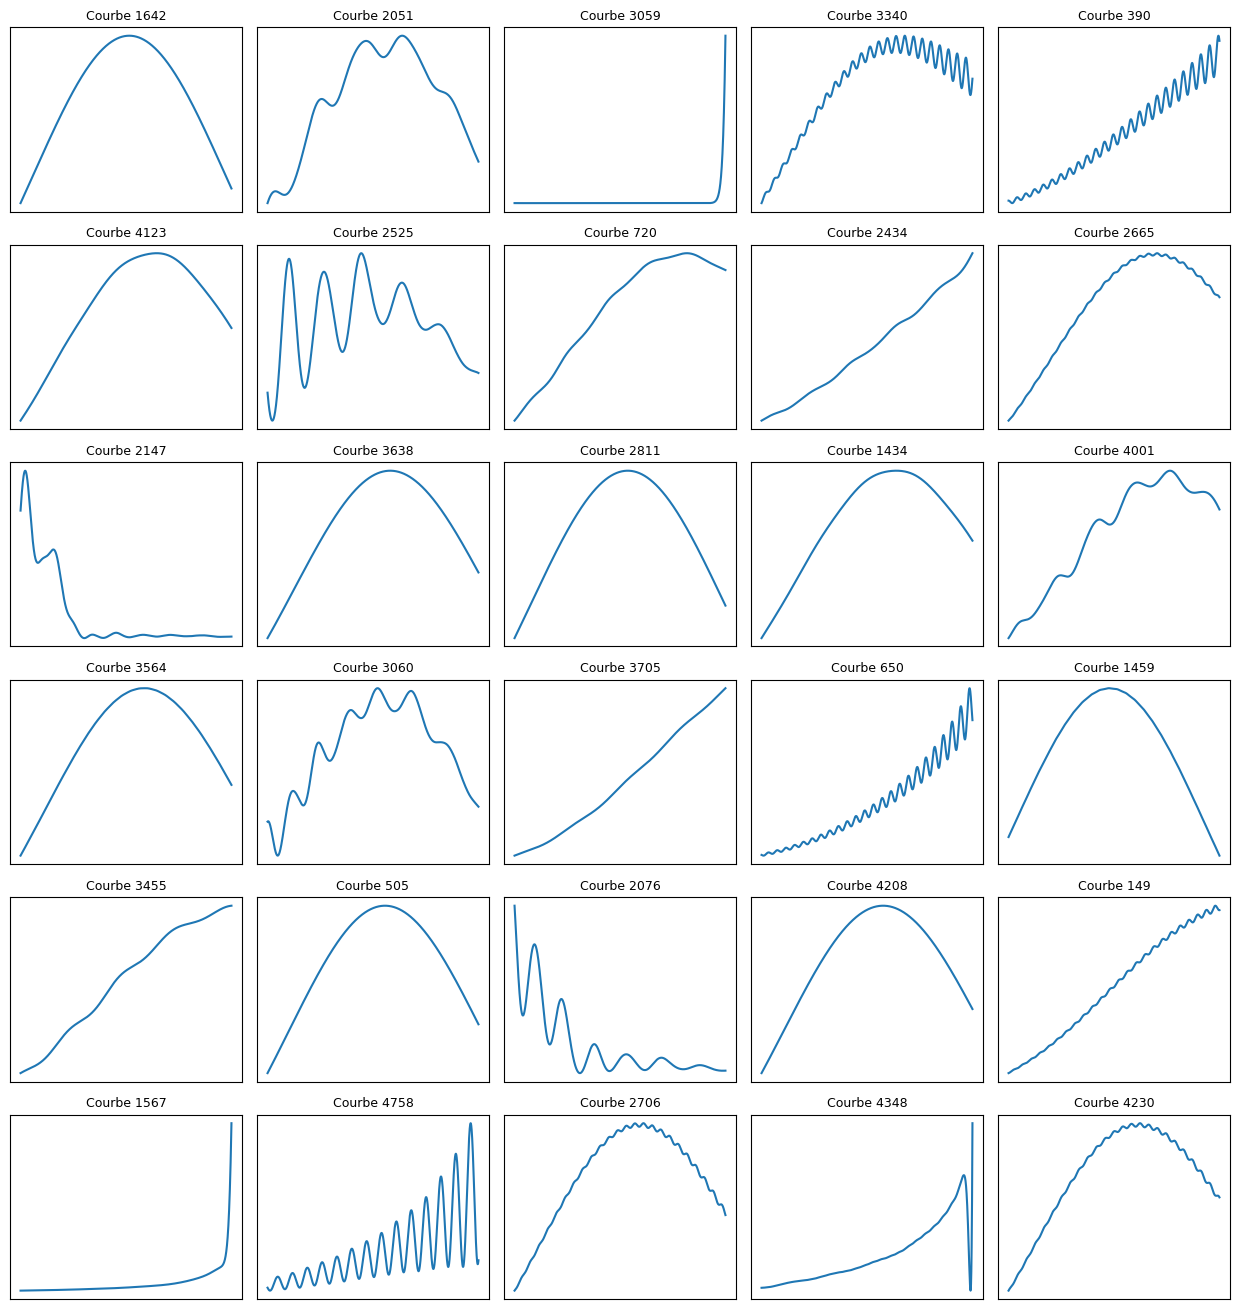

In [36]:
# Affichage de 30 courbes aléatoires parmi les données y_data
n_examples = 30
indices = np.random.choice(y_data.shape[0], n_examples, replace=False)

n_cols = 5
n_rows = 6

plt.figure(figsize=(2.5 * n_cols, 2.2 * n_rows))
for i, idx in enumerate(indices):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.plot(y_data[idx])
    plt.title(f"Courbe {idx}", fontsize=9)
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

In [ ]:
# # Sauvegarde des datasets au format .npy
# np.save('data/x_data.npy', x_data.values)
# np.save('data/y_data.npy', y_data)
# np.save('data/label_data.npy', label_data.values)
# print("Datasets sauvegardés dans le dossier data/")

Datasets sauvegardés dans le dossier data/


In [41]:
# Retirer les lignes où label_data == 0
mask = label_data['nombre_de_pics_5000'] != 0
x_data = x_data[mask].reset_index(drop=True)
y_data = y_data[mask.values]
label_data = label_data[mask].reset_index(drop=True)

print("x_data shape:", x_data.shape)
print("y_data shape:", y_data.shape)
print("label_data shape:", label_data.shape)

x_data shape: (4845, 4)
y_data shape: (4845, 5000)
label_data shape: (4845, 1)


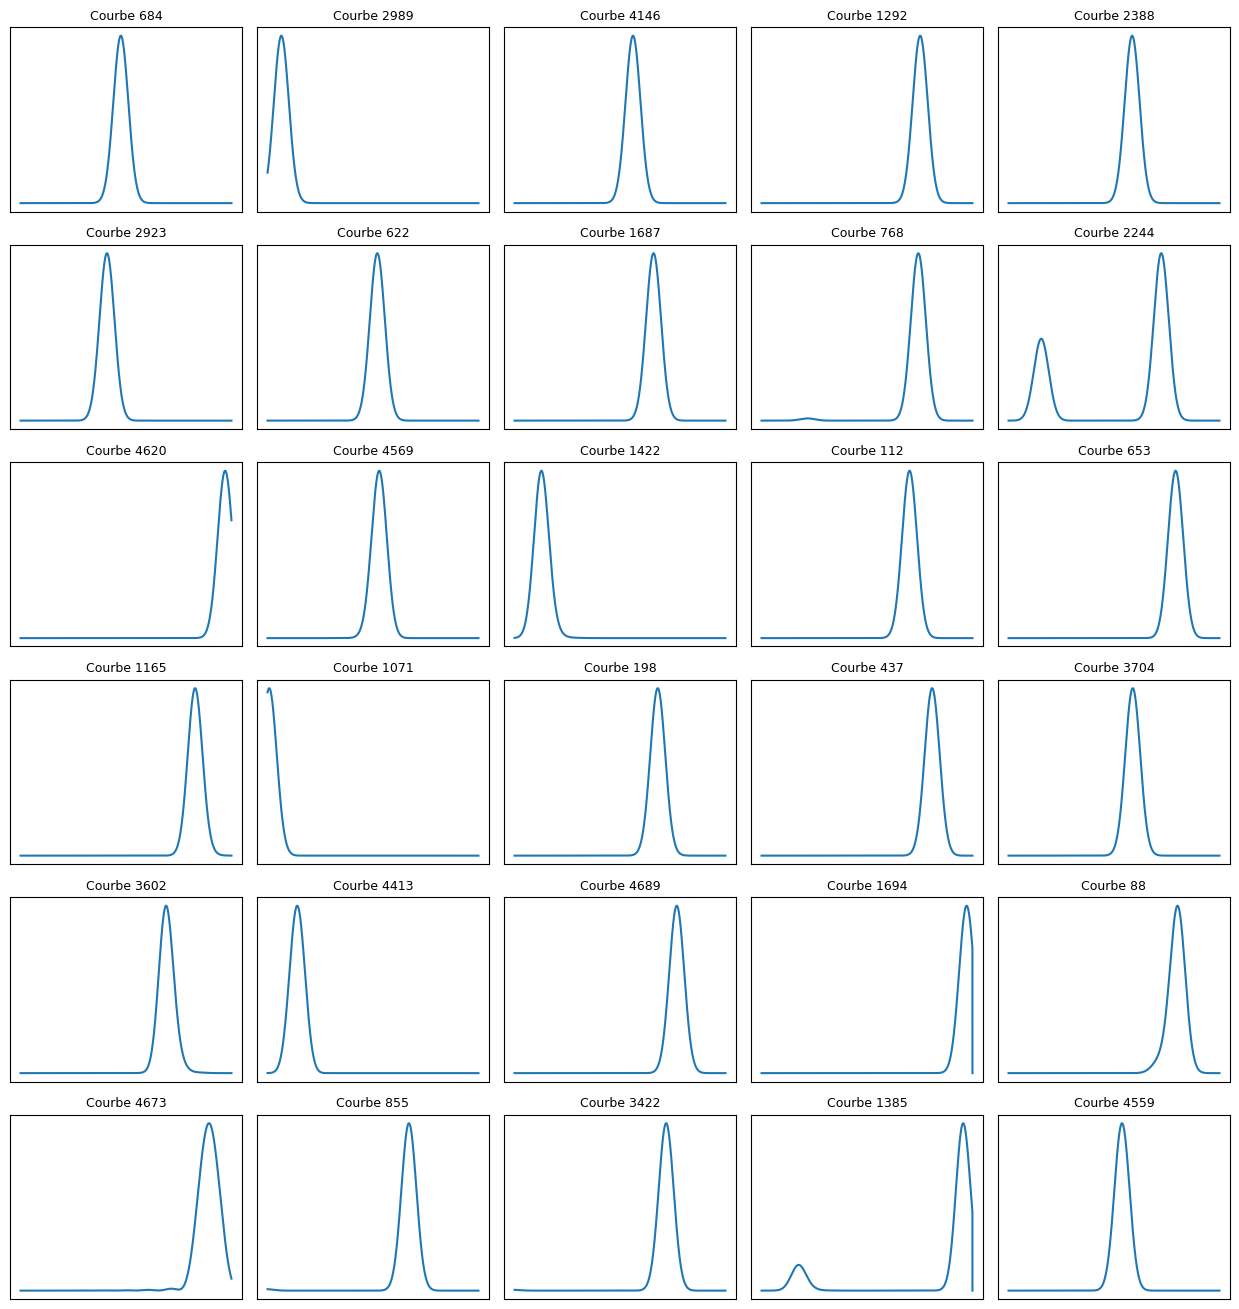

In [42]:
# Affichage de 30 courbes aléatoires parmi les données y_data
n_examples = 30
indices = np.random.choice(y_data.shape[0], n_examples, replace=False)

n_cols = 5
n_rows = 6

plt.figure(figsize=(2.5 * n_cols, 2.2 * n_rows))
for i, idx in enumerate(indices):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.plot(y_data[idx])
    plt.title(f"Courbe {idx}", fontsize=9)
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

In [43]:
# Sauvegarde des datasets au format .npy
np.save('data/x_data_sans_0.npy', x_data.values)
np.save('data/y_data_sans_0.npy', y_data)
np.save('data/label_data_sans_0.npy', label_data.values)
print("Datasets sauvegardés dans le dossier data/")

Datasets sauvegardés dans le dossier data/
